# Pandas

## Część I

Będziemy przetwarzać dane z Kaggle odnośnie imion dzieci w USA.

Krok 0: wczytaj pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("lab12_files/US_Baby_Names_right.csv")

Krok 1: wczytaj dane z pliku `US_Baby_Names_right.csv` z katalogu `lab12_files`

Krok 2: przypisz dane do zmiennej `baby_names`. Zobacz jakiego typu dane są przechowywane i ile jest rekordów

In [7]:
print(type(df))
baby_names=df
print(type(baby_names))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


Krok 3: podejrzy pierwszych 10 rekordów ze zbioru

In [8]:
baby_names.head(10)

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


Krok 4: usuń kolumny 'Unnamed: 0' oraz 'Id' 

In [12]:
baby_names = baby_names.drop(['Unnamed: 0','Id'],axis=1)
baby_names.head(10)

,Name,Year,Gender,State,Count
0,Emma,2004,F,AK,62
1,Madison,2004,F,AK,48
2,Hannah,2004,F,AK,46
3,Grace,2004,F,AK,44
4,Emily,2004,F,AK,41
5,Abigail,2004,F,AK,37
6,Olivia,2004,F,AK,33
7,Isabella,2004,F,AK,30
8,Alyssa,2004,F,AK,29
9,Sophia,2004,F,AK,28


Krok 5: czy w zbiorze jest więcej imion kobiet, czy mężczyzn?

In [15]:
baby_names['Gender'].value_counts().index[0]

'F'

Krok 6: zgrupuj wiersze względem imion i wypisz 10 najczęściej pojawiających się imion.

In [29]:
baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).head(10)

C:\Users\x\AppData\Local\Temp\ipykernel_26228\3312604374.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).head(10)


,Count
Name,
Jacob,242874
Emma,214852
Michael,214405
Ethan,209277
Isabella,204798
William,197894
Joshua,191551
Sophia,191446
Daniel,191440


Krok 7: wyniki z Kroku 6 zaprezentuj na wykresie korzystając z `matplotlib`. Przygotuj trzy wykresy, tj. 10 najczęsciej występujących imion: ogółem, u mężczyzn i u kobiet.

In [32]:
all=baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False)
age_index = all['Name']

C:\Users\x\AppData\Local\Temp\ipykernel_26228\2699094820.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all=baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False)


KeyError: 'Name'

C:\Users\x\AppData\Local\Temp\ipykernel_26228\536127476.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all=baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().head(10)


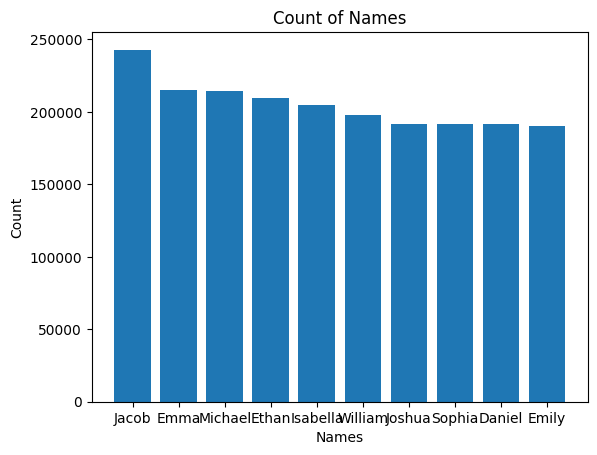

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
all=baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().head(10)
plt.bar(all['Name'], all['Count'])

plt.xlabel('Names')
plt.ylabel('Count')
plt.title('All')
plt.show()

C:\Users\x\AppData\Local\Temp\ipykernel_26228\2751398323.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all=female.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().head(10)


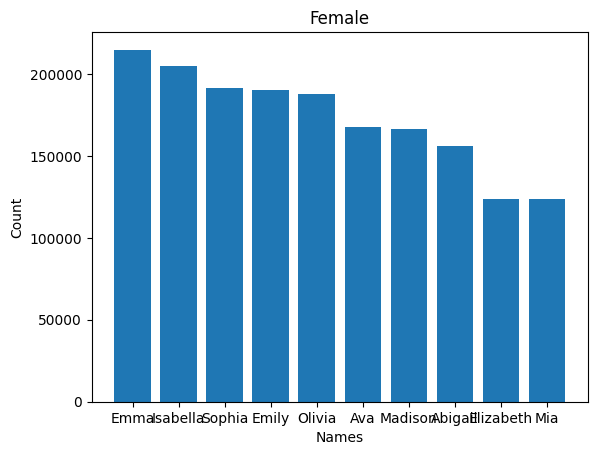

In [35]:
%matplotlib inline
female=baby_names[baby_names['Gender']=='F']
all=female.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().head(10)
plt.bar(all['Name'], all['Count'])

plt.xlabel('Names')
plt.ylabel('Count')
plt.title('Female')
plt.show()

C:\Users\x\AppData\Local\Temp\ipykernel_26228\3914190099.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all=male.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().head(10)


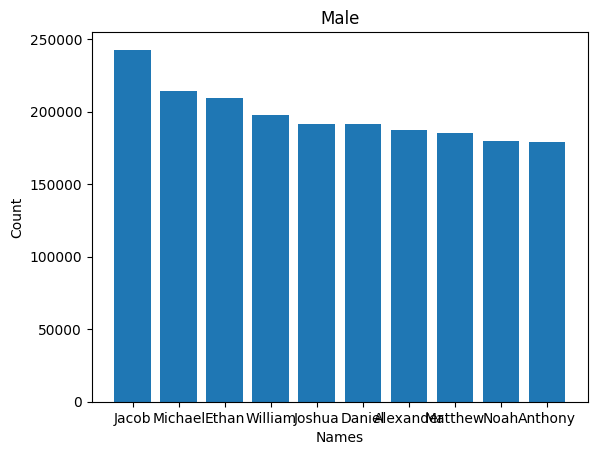

In [36]:
%matplotlib inline
male=baby_names[baby_names['Gender']=='M']
all=male.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().head(10)
plt.bar(all['Name'], all['Count'])

plt.xlabel('Names')
plt.ylabel('Count')
plt.title('Male')
plt.show()

Krok 8: Jak wiele różnych imion występuje w zbiorze?

In [39]:
len(pd.unique(baby_names['Name']))

17632

Krok 9: Przygotuj generator imion, losujący je zgodnie z rozkłądem prawdopodobieństwa otrzymanym na podstawie przetwarzanego pliku

In [42]:
import numpy as np
all=baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index()
probabilities = all['Count'] / all['Count'].sum()
def name_generator():
    while True:
        chosen_index = np.random.choice(all.index, p=probabilities)
        # Zwróć wybrane imię
        yield all.loc[chosen_index, 'Name']


generator = name_generator()
for _ in range(10):
    print(next(generator))

Giovanni
Alexander
Joseph
Brylee
Sebastian
Loryn
Braiden
Joseph
Amber
Antonella


C:\Users\x\AppData\Local\Temp\ipykernel_26228\1671549261.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all=baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index()


Krok 10: 
- Jakie imie występuje najczęściej?
- Wyznacz średnią, medianę i odchylenie stanadrdowe wystepowania imion.

In [44]:
baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().head(1)

C:\Users\x\AppData\Local\Temp\ipykernel_26228\167393781.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().head(1)


,Name,Count
0,Jacob,242874


In [50]:
print("mean: ",baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().mean())
print("median: ",baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().median())
print("std: ",baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().std())

C:\Users\x\AppData\Local\Temp\ipykernel_26228\2433479753.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("mean: ",baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().mean())
C:\Users\x\AppData\Local\Temp\ipykernel_26228\2433479753.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("mean: ",baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().mean())


mean:  Count    2008.932169
dtype: float64
median:  Count    49.0
dtype: float64


C:\Users\x\AppData\Local\Temp\ipykernel_26228\2433479753.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print("median: ",baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().median())
C:\Users\x\AppData\Local\Temp\ipykernel_26228\2433479753.py:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("median: ",baby_names.drop('Year',axis=1).groupby('Name').sum().sort_values(['Count'], ascending=False).reset_index().median())
C:\Users\x\AppData\Local\Temp\ipykernel_26228\2433479753.py:3: FutureWarning: The defaul

std:  Count    11006.069468
dtype: float64


## Część II

Krok 1: Wczytaj dane

Krok 2: Podejrzyj pierwsze 25 rekordów

Krok 3: Podejrzyj ostatnie 10 rekordów

Krok 4: Ile jest obserwacji w zbiorze? Ile jest kolumn w zbiorze?

Krok 5: Wypisz nazwy kolumn

Krok 6: Ile różnych zawodów jest w zbiorze?

Krok 7: Przygotuj efektywny wykres na którym przedstawisz procetowy udział poszczególnych zawodów w zbiorze na charplocie
Wykorzystaj https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html

Przygotuj dwa wykresy: 
- jeden z wszystkimi zawodami
- drugi z 10 najcześtrzymi zawodami, pozostałem zawody trafiają do kategorii `Inne`

Krok 8: Przygotuj efektywny wykres na którym przedstawisz 10 najczęstrzych zawodów oraz ile pracuje w nich kobiet a ilu meżczyzn
Wykorzystaj https://matplotlib.org/gallery/api/barchart.html#sphx-glr-gallery-api-barchart-py

Krok 9: Przygotuj efektywny wykres na którym przedstawisz średni wiek pracowników danego zawodu

Krok 10: Przygotuj efektywny wykres na którym przedstawisz średni wiek kobiet i mężczyzn wykonujących dany zawód.